# In this Chapter we will know :-
• How to use Haar cascades

• What are integral images

• What is adaptive boosting

• How to detect and track faces in a live video stream

• How to detect and track eyes in a live video stream

• How to automatically overlay sunglasses on top of a person's face

• How to detect ears, nose, and mouth

• How to detect pupils using shape analysis

# Using Haar cascades to detect things

Let's say we want to detect an object like, say, a pineapple. To solve this, we need to build a machine learning system that will learn what a pineapple looks like. It should be able to tell us if an unknown image contains a pineapple or not. To achieve something like this, we need to train our system. In the realm of machine learning, we have a lot of methods available to train a system. It's a lot like training a dog, except that it won't fetch the ball for you! To train our system, we take a lot of pineapple and non-pineapple images, and then feed them into the system. Here, pineapple images are called positive images and the non-pineapple images are called negative images.

# Coming to the topic of face detection,
let's see how to train a system to detect faces. If we want to build a machine learning system, we first need to extract features from all the images. In our case, the machine learning algorithms will use these features to learn what a face looks like. We use Haar features to build our feature vectors. Haar features are simple summations and differences of patches across the image. We do this at multiple image sizes to make sure our system is scale invariant.

# What are integral images?

If we want to compute Haar features, we will have to compute the summations of many different rectangular regions within the image. If we want to effectively build the feature set, we need to compute these summations at multiple scales. This is a very expensive process! If we want to build a real time system, we cannot spend so many cycles in computing these sums. So we use something called integral images

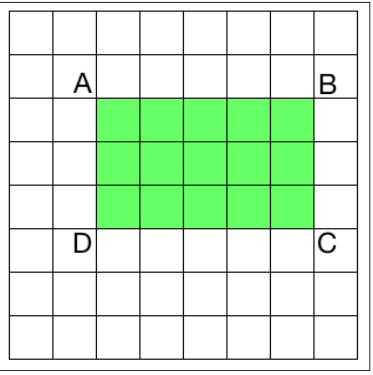

# Detecting and tracking faces

In [ ]:
import cv2 
import numpy as np 
from os import path 

In [ ]:
# read the xml file of haarcascade
xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(xml_classifier)

cap = cv2.VideoCapture(0)
scaling_factor = 1.5

#reading from live cam 
while True:
    ret,frame = cap.read()
    frame = cv2.resize(frame,None,fx=scaling_factor,fy=scaling_factor,interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # detectMultscale to detect all the faces in the image , 1.3>> time to check 
    face_rects = face_cascade.detectMultiScale(gray,1.3,5) 
    for(x,y,w,h) in face_rects:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    
    cv2.imshow('Face Detector',frame)
    
    c=cv2.waitKey(1)
    if c==27:
        break
cap.release()
cv2.destroyAllWindows()

# Fun with faces

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# show the mask 
face_mask = cv2.imread('HNBL.webp')
copy = cv2.cvtColor(face_mask,cv2.COLOR_BGR2RGB)
plt.imshow(copy)

In [ ]:
h_mask , w_mask=face_mask.shape[:2]
xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(xml_classifier)

cap = cv2.VideoCapture(0)
scaling_factor = 1.5

while True :
    ret,frame = cap.read()
    frame = cv2.resize(frame,None,fx=scaling_factor,fy=scaling_factor,interpolation = cv2.INTER_AREA)
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    face_rects = face_cascade.detectMultiScale(gray,1.3,5)
    
    for(x,y,w,h) in face_rects:
        if h > 0 and w > 0:
            h,w = int(1.4*h),int(1.0*w)
            y -=0.1*h
            y = int(y)
            # Extract the region of interest from the image
            frame_roi = frame[y:y+h , x:x+w]
            face_mask_small = cv2.resize(face_mask,(w,h),interpolation=cv2.INTER_AREA)
            
            # Convert color image to grayscale and threshold it
            gray_mask = cv2.cvtColor(face_mask_small,cv2.COLOR_BGR2GRAY)
            
            ret,mask = cv2.threshold(gray_mask,180,255,cv2.THRESH_BINARY_INV)
            
            # Create an inverse mask
            mask_inv = cv2.bitwise_not(mask)
            
            # Use the mask to extract the face mask region of interest
            masked_face = cv2.bitwise_and(face_mask_small,face_mask_small , mask=mask)
            
            # Use the inverse mask to get the remaining part of the image
            masked_frame = cv2.bitwise_and(frame_roi, frame_roi, mask=mask_inv)
            
            # add the two images to get the final output
            frame[y:y+h, x:x+w] = cv2.add(masked_face, masked_frame)
            
    cv2.imshow('Face Detector', frame)
    c = cv2.waitKey(1)
    if c==27:
        break

cap.release()
cv2.destroyAllWindows()
            

# Detecting Eyes

Let's see how to build an eye detector:

In [ ]:
# import important package

import cv2 
import numpy as np 
from os import path 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(xml_classifier)

xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_eye.xml')
eye_cascade = cv2.CascadeClassifier(xml_classifier)

cap = cv2.VideoCapture(0)
scalling_factor = 0.5

while True:
    ret,frame = cap.read()
    frame = cv2.resize(frame,None,fx=scalling_factor,fy=scalling_factor,interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        roi_gray  = gray[y:y+h , x:x+w] # face in gray level 
        roi_frame = frame[y:y+h , x:x+w] # face in RGB level 
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(xe,ye,we,he) in eyes:
            center = (int(xe + 0.5*we ),int(ye+0.5*he))
            radius = int(0.3*(we+he))
            color = (0,255,0)
            thickness = 3
            cv2.circle(roi_frame,center,radius,color,thickness)
        
    cv2.imshow('eye detector',frame)
    cv2.imshow('face gray',roi_gray)
    cv2.imshow('face BGR',roi_frame)
        
    c=cv2.waitKey(1)
    if c==27:
        break
            
cap.release()
cv2.destroyAllWindows()

# Fun with eyes

In [ ]:
# import important package

import cv2 
import numpy as np 
from os import path 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(xml_classifier)

xml_classifier = path.join(path.dirname(cv2.__file__),'data','haarcascade_eye.xml')
eye_cascade = cv2.CascadeClassifier(xml_classifier)

img = cv2.imread('1.jpg')
sunglass = cv2.imread('3.png')

gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

centers = []
faces = face_cascade.detectMultiScale(gray,1.3,5)

for(x,y,w,h) in faces:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = img[y:y+h , x:x+w]
#     cv2.imshow('Sunglasses', roi_gray)    
#     cv2.waitKey()    
#     cv2.destroyAllWindows()
    eyes = eye_cascade.detectMultiScale(roi_gray,1.3,5)
    print('eyes is',eyes)
    for(xe,ye,we,he) in eyes:
        centers.append(( int(x)+int(xe+0.5*we), int(y)+int(ye+0.5*he)))

print('here')
    
if len(centers) > 0 :
    # Overlay sunglasses; the factor 2.12 is customizable depending on the size of the face
    sunglasses_width = 2.12 * abs(centers[1][0] - centers[0][0])
    overlay_img = np.ones(img.shape, np.uint8) * 255
    
#     cv2.imshow('overlay',overlay_img)
#     cv2.waitKey()
#     cv2.destroyWindow()
    
    h, w = sunglass.shape[:2]
    scaling_factor = sunglasses_width / w
    overlay_sunglasses = cv2.resize(sunglass, None, fx=scaling_factor,fy=scaling_factor,interpolation=cv2.INTER_AREA)
    
#     cv2.imshow('overlay2',overlay_img)
#     cv2.waitKey()
#     cv2.destroy()
    
    x = centers[0][0] if centers[0][0] < centers[1][0] else centers[1][0]
    
    x -= int(0.26*overlay_sunglasses.shape[1])
    y += int(0.85*overlay_sunglasses.shape[0])
    
    h, w = overlay_sunglasses.shape[:2]    
    overlay_img[y:y+h, x:x+w] = overlay_sunglasses
    
    gray_sunglasses = cv2.cvtColor(overlay_img, cv2.COLOR_BGR2GRAY)    
    ret, mask = cv2.threshold(gray_sunglasses, 110, 255, cv2.THRESH_BINARY)    
    mask_inv = cv2.bitwise_not(mask)    
    temp = cv2.bitwise_and(img, img, mask=mask)    
    temp2 = cv2.bitwise_and(overlay_img, overlay_img, mask=mask_inv)    
    final_img = cv2.add(temp, temp2)
    
    cv2.imshow('Eye Detector', img)    
    cv2.imshow('Sunglasses', final_img)    
    cv2.waitKey()    
    cv2.destroyAllWindows()